In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
img_size=100

In [3]:
con_base=VGG16(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
from keras import layers
from keras import models
model=models.Sequential()
model.add(con_base)
model.add(layers.Flatten())
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(120,activation='softmax'))

In [5]:
con_base.trainable=False

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 15,925,432
Trainable params: 1,210,744
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_path='data/images/train'
val_path='data/images/val'

Train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode="nearest",
    horizontal_flip=True,
) 
Test_datagen = ImageDataGenerator(
    rescale=1./255
) 

In [9]:
Train_generator=Train_datagen.flow_from_directory(train_path,target_size=(img_size,img_size),batch_size=128,class_mode='categorical')

Found 15779 images belonging to 120 classes.


In [10]:
Val_generator=Test_datagen.flow_from_directory(val_path,target_size=(img_size,img_size),batch_size=128,class_mode='categorical')

Found 3600 images belonging to 120 classes.


In [11]:
history=model.fit_generator(
    Train_generator,
    #steps_per_epoch=100,
    epochs=30,
    validation_data=Val_generator,
    validation_steps=50
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
124/124 [==============================] - 129s 1s/step - loss: 4.7212 - accuracy: 0.0270 - val_loss: 4.5565 - val_accuracy: 0.0413
Epoch 2/30
124/124 [==============================] - 69s 560ms/step - loss: 4.3672 - accuracy: 0.0634 - val_loss: 4.1819 - val_accuracy: 0.0848
Epoch 3/30
124/124 [==============================] - 68s 547ms/step - loss: 4.0825 - accuracy: 0.0936 - val_loss: 3.8980 - val_accuracy: 0.1023
Epoch 4/30
124/124 [==============================] - 68s 547ms/step - loss: 3.9110 - accuracy: 0.1167 - val_loss: 3.8614 - val_accuracy: 0.1245
Epoch 5/30
124/124 [==============================] - 71s 572ms/step - loss: 3.8046 - accuracy: 0.1316 - val_loss: 3.7653 - val_accuracy: 0.1347
Epoch 6/30
124/124 [==============================] - 69s 553ms/step - loss: 3.7324 - accuracy: 0.1446 - val_loss: 3.7207 - val_accuracy: 0.1540
Epoch 7/30
124/124 [==============================] - 68s 547ms/step - loss: 3.6758 

In [12]:
model.save('model_V4_30epochs.h5')

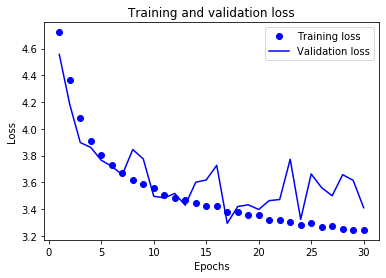

In [13]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
plt.savefig("model_V4_30epochs_2-1.png")

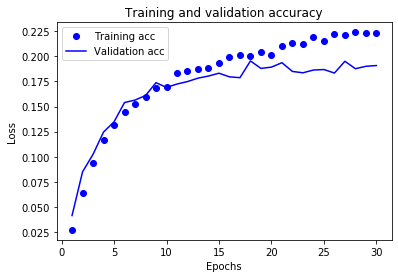

In [14]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
plt.savefig("model_V4_30epochs_2-2.png")